In [13]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
start_date='2017-02-01'
end_date='2017-04-01'
dates=pd.date_range(start_date, end_date)
df1 = pd.DataFrame(index=dates)
for symb in ['AAPL', 'HCP']:
    df_temp = pd.read_csv("../data/%s.csv" % symb, index_col="Date", parse_dates=True, \
                    usecols=["Date", "Adj Close"], na_values=['nan'])
    df_temp = df_temp.rename(columns={"Adj Close": symb})
#     print df_temp.head()
    df1 = df1.join(df_temp, lsuffix="1", rsuffix="2")
df1 = df1.dropna(how="any")

In [4]:
daily_returns = df1.copy()
daily_returns[1:] = (df1[1:] / df1[:-1].values) - 1 
daily_returns.ix[0,:] = 0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f796110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f840350>]], dtype=object)

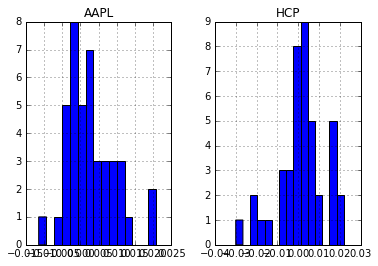

In [9]:
daily_returns.hist(bins=15)

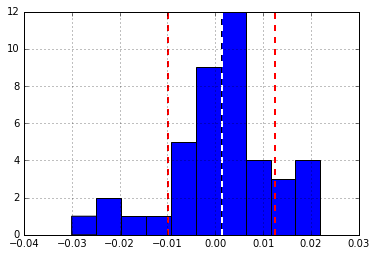

In [20]:
mean = daily_returns['HCP'].mean()
std = daily_returns['HCP'].std()
daily_returns['HCP'].hist(bins=10)
plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(mean-std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(mean+std, color='r', linestyle='dashed', linewidth=2)

In [21]:
daily_returns['HCP'].kurtosis()

0.78750858792606127

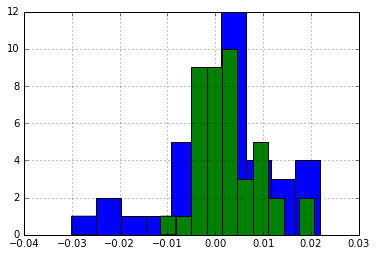

In [23]:
daily_returns['HCP'].hist(bins=10, label='HCP')
daily_returns['AAPL'].hist(bins=10, label='AAPL')

0.143215629674 0.000922290090442


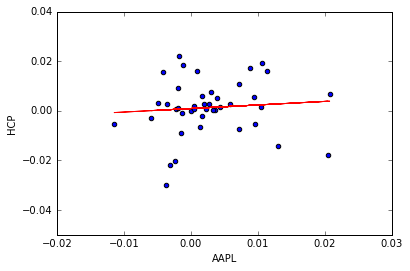

In [28]:
daily_returns.plot(kind='scatter', x='AAPL', y='HCP')
beta_XOM, alpha_XOM = np.polyfit(daily_returns['AAPL'], daily_returns['HCP'], 1)
print beta_XOM, alpha_XOM
plt.plot(daily_returns['AAPL'], beta_XOM*daily_returns['AAPL'] + alpha_XOM, '-', color='r')